# Compare Machine Learning Algorithms: A Guide for Regression Task

## 1. Upload data from Local File System.

In [ ]:
from google.colab import files

uploaded = files.upload() 

Saving Energy_efficiency_DataSet.csv to Energy_efficiency_DataSet (2).csv


## 2. Take a peek at your raw data.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

names = ['RC', 'SA', 'WA', 'RA', 'OH', 'O', 'GA', 'GAD', 'HL', 'CL']
data = pd.read_csv('Energy_efficiency_DataSet.csv', names=names, comment='#')
peek = data.head(20)
print(peek)

      RC     SA     WA      RA   OH  O   GA  GAD     HL     CL
0   0.98  514.5  294.0  110.25  7.0  2  0.0    0  15.55  21.33
1   0.98  514.5  294.0  110.25  7.0  3  0.0    0  15.55  21.33
2   0.98  514.5  294.0  110.25  7.0  4  0.0    0  15.55  21.33
3   0.98  514.5  294.0  110.25  7.0  5  0.0    0  15.55  21.33
4   0.90  563.5  318.5  122.50  7.0  2  0.0    0  20.84  28.28
5   0.90  563.5  318.5  122.50  7.0  3  0.0    0  21.46  25.38
6   0.90  563.5  318.5  122.50  7.0  4  0.0    0  20.71  25.16
7   0.90  563.5  318.5  122.50  7.0  5  0.0    0  19.68  29.60
8   0.86  588.0  294.0  147.00  7.0  2  0.0    0  19.50  27.30
9   0.86  588.0  294.0  147.00  7.0  3  0.0    0  19.95  21.97
10  0.86  588.0  294.0  147.00  7.0  4  0.0    0  19.34  23.49
11  0.86  588.0  294.0  147.00  7.0  5  0.0    0  18.31  27.87
12  0.82  612.5  318.5  147.00  7.0  2  0.0    0  17.05  23.77
13  0.82  612.5  318.5  147.00  7.0  3  0.0    0  17.41  21.46
14  0.82  612.5  318.5  147.00  7.0  4  0.0    0  16.95

## 3. Retrieve `features` and `class`

In [ ]:
array = data.values
X = array[:,0:-2]
Y = array[:,-1]

In [ ]:
print(X)  # features

[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]


In [ ]:
print(Y) # class

[21.33 21.33 21.33 21.33 28.28 25.38 25.16 29.6  27.3  21.97 23.49 27.87
 23.77 21.46 21.16 24.93 37.73 31.27 30.93 39.44 29.79 29.68 29.79 29.4
 10.9  11.19 10.94 11.17 11.27 11.72 11.29 11.67 11.74 12.05 11.73 11.93
 12.4  12.23 12.4  12.14 16.78 16.8  16.75 16.67 12.07 12.22 12.08 12.04
 26.47 26.37 26.44 26.29 32.92 29.87 29.58 34.33 30.89 25.6  27.03 31.73
 27.31 24.91 24.61 28.51 41.68 35.28 34.43 43.33 33.87 34.07 34.14 33.67
 13.43 13.71 13.48 13.7  13.8  14.28 13.87 14.27 14.28 14.61 14.3  14.45
 13.9  13.72 13.88 13.65 19.37 19.43 19.34 19.32 14.34 14.5  14.33 14.27
 25.95 25.63 26.13 25.89 32.54 29.44 29.36 34.2  30.91 25.63 27.36 31.9
 27.38 25.02 24.8  28.79 41.07 34.62 33.87 42.86 33.91 34.07 34.17 33.78
 13.39 13.72 13.57 13.79 13.67 14.11 13.8  14.21 13.2  13.54 13.32 13.51
 14.86 14.75 15.   14.74 19.23 19.34 19.32 19.3  14.37 14.57 14.27 14.24
 25.68 26.02 25.84 26.14 34.14 32.85 30.08 29.67 31.73 31.01 25.9  27.4
 28.68 27.54 25.35 24.93 43.12 41.22 35.1  34.29 33.85

## 4. Prepare `models`

In [ ]:
# container for all models
models = []

### 4.1. Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
models.append(('LR', lr))

### 4.2. Support Vector Machines

In [ ]:
from sklearn.svm import SVR

svm = SVR()
models.append(('SVM', svm))

### 4.3. Artificial Neural Network - Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()
models.append(('MLP', ann))

### 4.4. Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor

# create containers of all sub models
estimators = []

# Linear Regression
model0 = LinearRegression()
estimators.append(('lr', model0))

# Support Vector Machine
model2 = SVR()
estimators.append(('svm', model2))

# Artificial Neural Network - Multilayer Perceptron
model3 = MLPRegressor()
estimators.append(('ann', model3))

# Create the ENSEMBLE model
vot = VotingRegressor(estimators)
models.append(('VOT', vot))

### 4.5. Bagging Ensembles

#### 4.5.1. Linear Regression as base estimator

In [ ]:
from sklearn.ensemble import BaggingRegressor

baglr = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10)
models.append(('BAGLR', baglr))

#### 4.5.2. Support Vector Machine as base estimator

In [ ]:
bagsvm = BaggingRegressor(base_estimator=SVR(), n_estimators=10)
models.append(('BAGSVM', bagsvm))

#### 4.5.3. Artificial Neural Network as base estimator

In [ ]:
bagann = BaggingRegressor(base_estimator=MLPRegressor(), n_estimators=10)
models.append(('BAGMLP', bagann))

### 4.6. Boosting Ensembles

#### 4.6.1. Linear Regression as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adalr = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10)
models.append(('ADALR', adalr))

#### 4.6.2. Support Vector Machines as base estimator

In [ ]:
adasvm = AdaBoostRegressor(base_estimator=SVR(), n_estimators=10)
models.append(('ADASVM', adasvm))

#### 4.6.3. Artificial Neural Network as base estimator

In [ ]:
# not applicable

## 5. `Train` and `Cross-valiidate`

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


results = []
names = []
msgs = []
scoring = 'neg_mean_squared_error'

for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s:\t %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msgs.append(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 6. `Boxplot` Algorithm Comparison

In [ ]:
for msg in msgs:
  print(msg)

LR:	 -10.578179 (2.596409)
SVM:	 -25.915327 (8.230161)
MLP:	 -18.443528 (8.399101)
VOT:	 -14.264508 (4.279086)
BAGLR:	 -10.643047 (2.826461)
BAGSVM:	 -25.930112 (8.219829)
BAGMLP:	 -16.723633 (5.584038)
ADALR:	 -10.854517 (2.593057)
ADASVM:	 -22.430207 (6.273124)


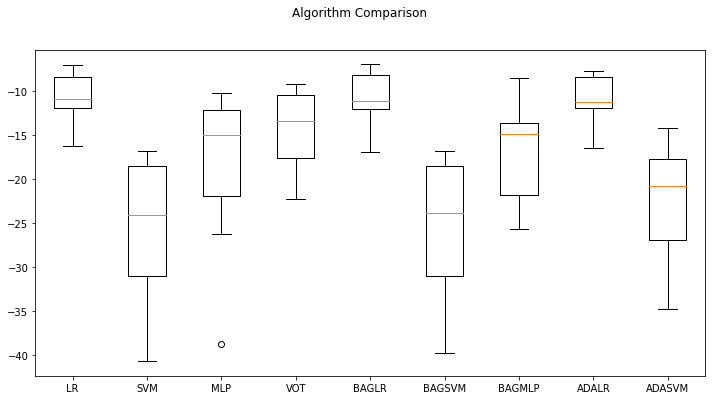

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()